This is a working copy

In [12]:
from sqlalchemy import create_engine
from sqlalchemy import inspect
import pandas as pd

In [13]:
# Getting started with moving data into python
engine = create_engine('sqlite:////home/aziker/MTA_data/mta_data.db')

In [14]:
engine

Engine(sqlite:////home/aziker/MTA_data/mta_data.db)

In [15]:
insp = inspect(engine)
print(insp.get_table_names())

['mta_data']


In [16]:
mta_df = pd.read_sql('SELECT * FROM mta_data;', engine)
mta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2722610 entries, 0 to 2722609
Data columns (total 11 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   C/A       object
 1   UNIT      object
 2   SCP       object
 3   STATION   object
 4   LINENAME  object
 5   DIVISION  object
 6   DATE      object
 7   TIME      object
 8   DESC      object
 9   ENTRIES   int64 
 10  EXITS     int64 
dtypes: int64(2), object(9)
memory usage: 228.5+ MB


In [17]:
#checking for whitespace
mta_df.columns = [column.strip() for column in mta_df.columns]
mta_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [18]:
import datetime

In [19]:
mta_df["DATE_TIME"] = pd.to_datetime(mta_df.DATE + " " + mta_df.TIME)
mta_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,00:00:00,REGULAR,7622548,2607689,2021-08-21 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,04:00:00,REGULAR,7622561,2607697,2021-08-21 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,08:00:00,REGULAR,7622573,2607718,2021-08-21 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,12:00:00,REGULAR,7622604,2607766,2021-08-21 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,16:00:00,REGULAR,7622715,2607802,2021-08-21 16:00:00


In [20]:
mta_df.DESC.value_counts()

REGULAR       2710456
RECOVR AUD      12154
Name: DESC, dtype: int64

In [21]:
#checking for duplicates
(mta_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(50)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
2448636,R514,R094,00-05-00,ASTORIA BLVD,2021-07-22 04:00:00,2
1172385,N335,R158,01-00-03,KEW GARDENS,2021-06-20 18:30:00,2
2457222,R516,R291,00-00-02,33 ST-RAWSON ST,2021-08-25 00:00:00,2
2457223,R516,R291,00-00-02,33 ST-RAWSON ST,2021-08-25 04:00:00,2
2457224,R516,R291,00-00-02,33 ST-RAWSON ST,2021-08-25 08:00:00,2
2457225,R516,R291,00-00-02,33 ST-RAWSON ST,2021-08-25 12:00:00,2
2457226,R516,R291,00-00-02,33 ST-RAWSON ST,2021-08-25 16:00:00,2
2457227,R516,R291,00-00-02,33 ST-RAWSON ST,2021-08-25 20:00:00,2
2457228,R516,R291,00-00-02,33 ST-RAWSON ST,2021-08-26 00:00:00,2
2457230,R516,R291,00-00-02,33 ST-RAWSON ST,2021-08-26 08:00:00,2


In [22]:
#see if we can ignore, or have to deal with duplicates
mask = ((mta_df["C/A"] == "R516") & 
(mta_df["UNIT"] == "R291") & 
(mta_df["SCP"] == "00-00-00") & 
(mta_df["STATION"] == "33 ST-RAWSON ST") &
(mta_df["DATE_TIME"].dt.date == datetime.datetime(2021, 8, 25).date()))

mta_df[mask].head(5)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
188774,R516,R291,00-00-00,33 ST-RAWSON ST,7,IRT,08/25/2021,00:00:00,REGULAR,8290786,13147897,2021-08-25 00:00:00
188775,R516,R291,00-00-00,33 ST-RAWSON ST,7,IRT,08/25/2021,00:00:00,RECOVR AUD,2073354,1083493,2021-08-25 00:00:00
188776,R516,R291,00-00-00,33 ST-RAWSON ST,7,IRT,08/25/2021,04:00:00,REGULAR,8290786,13147919,2021-08-25 04:00:00
188777,R516,R291,00-00-00,33 ST-RAWSON ST,7,IRT,08/25/2021,08:00:00,REGULAR,8290801,13148231,2021-08-25 08:00:00
188778,R516,R291,00-00-00,33 ST-RAWSON ST,7,IRT,08/25/2021,08:00:00,RECOVR AUD,2073376,1083606,2021-08-25 08:00:00
188779,R516,R291,00-00-00,33 ST-RAWSON ST,7,IRT,08/25/2021,12:00:00,REGULAR,8290825,13148656,2021-08-25 12:00:00
188780,R516,R291,00-00-00,33 ST-RAWSON ST,7,IRT,08/25/2021,12:00:00,RECOVR AUD,2073431,1083737,2021-08-25 12:00:00
188781,R516,R291,00-00-00,33 ST-RAWSON ST,7,IRT,08/25/2021,16:00:00,REGULAR,8290881,13148820,2021-08-25 16:00:00
188782,R516,R291,00-00-00,33 ST-RAWSON ST,7,IRT,08/25/2021,16:00:00,RECOVR AUD,2073533,1083789,2021-08-25 16:00:00
188783,R516,R291,00-00-00,33 ST-RAWSON ST,7,IRT,08/25/2021,20:00:00,REGULAR,8291005,13148951,2021-08-25 20:00:00


In [23]:
"""will have to deal, as they affect entries
   based on the fact that duplicates would make data analysis for daily traffic impossible,
   and it's illocgical to go through 12000 duplicate cases,
   I am inclined to remove the duplicate recovr AUD and go with the regular submissions"""

"will have to deal, as they affect both entries and exits\n   based on the fact that duplicates would make data analysis for daily traffic impossible,\n   and it's illocgical to go through 12000 duplicate cases,\n   I am inclined to remove the duplicate recovr AUD and go with the regular submissions"

In [24]:
mta_df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True, ascending=False)

mta_df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [25]:
(mta_df.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"]).ENTRIES.count()\
 .reset_index().sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2021-05-29 00:00:00,1
1815048,R138,R293,00-03-02,34 ST-PENN STA,2021-07-22 18:00:00,1
1815050,R138,R293,00-03-02,34 ST-PENN STA,2021-07-23 02:00:00,1
1815051,R138,R293,00-03-02,34 ST-PENN STA,2021-07-23 06:00:00,1
1815052,R138,R293,00-03-02,34 ST-PENN STA,2021-07-23 10:00:00,1


In [26]:
mta_daily_entries = (mta_df.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False)\
                        .ENTRIES.first())
mta_daily_entries

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,05/29/2021,7579021
1,A002,R051,02-00-00,59 ST,05/30/2021,7579275
2,A002,R051,02-00-00,59 ST,05/31/2021,7579593
3,A002,R051,02-00-00,59 ST,06/01/2021,7580178
4,A002,R051,02-00-00,59 ST,06/02/2021,7580754
...,...,...,...,...,...,...
454566,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/23/2021,5554
454567,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/24/2021,5554
454568,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/25/2021,5554
454569,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/26/2021,5554


In [27]:
mta_daily_entries["DAILY_ENTRIES"] = mta_daily_entries.groupby(["C/A", "UNIT", "SCP", "STATION"]).ENTRIES.apply(lambda x: x-x.shift(1))
mta_daily_entries.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,DAILY_ENTRIES
0,A002,R051,02-00-00,59 ST,05/29/2021,7579021,NaN
1,A002,R051,02-00-00,59 ST,05/30/2021,7579275,254.0
2,A002,R051,02-00-00,59 ST,05/31/2021,7579593,318.0
3,A002,R051,02-00-00,59 ST,06/01/2021,7580178,585.0
4,A002,R051,02-00-00,59 ST,06/02/2021,7580754,576.0


In [28]:
#making prev dates/entries to check for negative daily entries
mta_daily_entries[["PREV_DATE", "PREV_ENTRIES"]] = (mta_daily_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])[["DATE", "ENTRIES"]]\
                                                        .apply(lambda grp: grp.shift(1)))
mta_daily_entries.dropna(subset=["PREV_DATE"], axis=0, inplace=True)
mta_daily_entries.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,DAILY_ENTRIES,PREV_DATE,PREV_ENTRIES
1,A002,R051,02-00-00,59 ST,05/30/2021,7579275,254.0,05/29/2021,7579021.0
2,A002,R051,02-00-00,59 ST,05/31/2021,7579593,318.0,05/30/2021,7579275.0
3,A002,R051,02-00-00,59 ST,06/01/2021,7580178,585.0,05/31/2021,7579593.0
4,A002,R051,02-00-00,59 ST,06/02/2021,7580754,576.0,06/01/2021,7580178.0
5,A002,R051,02-00-00,59 ST,06/03/2021,7581328,574.0,06/02/2021,7580754.0


In [29]:
(mta_daily_entries[mta_daily_entries["ENTRIES"] < mta_daily_entries["PREV_ENTRIES"]]).shape

(4242, 9)

In [30]:
mta_daily_entries[mta_daily_entries["ENTRIES"] < mta_daily_entries["PREV_ENTRIES"]].reset_index().head()

,index,C/A,UNIT,SCP,STATION,DATE,ENTRIES,DAILY_ENTRIES,PREV_DATE,PREV_ENTRIES
0,3550,A011,R080,01-03-00,57 ST-7 AV,05/30/2021,885601428,-173.0,05/29/2021,885601601.0
1,3551,A011,R080,01-03-00,57 ST-7 AV,05/31/2021,885601312,-116.0,05/30/2021,885601428.0
2,3552,A011,R080,01-03-00,57 ST-7 AV,06/01/2021,885601073,-239.0,05/31/2021,885601312.0
3,3553,A011,R080,01-03-00,57 ST-7 AV,06/02/2021,885600833,-240.0,06/01/2021,885601073.0
4,3554,A011,R080,01-03-00,57 ST-7 AV,06/03/2021,885600606,-227.0,06/02/2021,885600833.0


In [31]:
#stations with negative issues
(mta_daily_entries[mta_daily_entries["ENTRIES"] < mta_daily_entries["PREV_ENTRIES"]]\
     .groupby(["C/A", "UNIT", "SCP", "STATION"])\
     .size())

C/A   UNIT  SCP       STATION        
A011  R080  01-03-00  57 ST-7 AV         90
A013  R081  01-06-01  49 ST               1
A014  R081  02-00-00  49 ST               1
A049  R088  02-00-02  CORTLANDT ST        1
            02-05-00  CORTLANDT ST       34
                                         ..
R621  R060  00-06-00  EASTN PKWY-MUSM     1
R622  R123  00-00-00  FRANKLIN AV        90
R633  R068  00-00-01  VAN SICLEN AV       1
R646  R110  01-00-02  FLATBUSH AV-B.C     1
R730  R431  00-00-04  EASTCHSTER/DYRE    90
Length: 195, dtype: int64

In [32]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    
    if counter < 0:
        counter = -counter  
        
    if counter > max_counter:
        
        print(f'entries: {row["ENTRIES"]} <-- {row["PREV_ENTRIES"]}')
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
        
    if counter > max_counter:
        
        return 0
    
    return counter
#testing here to see what it looks like when you assume you cannot have more than 1 person per turnstile per second,
#plus some room for error, thus my max counter is 10000
mta_daily_entries["DAILY_ENTRIES"] = mta_daily_entries.apply(get_daily_counts, axis=1, max_counter=(10000))

entries: 427 <-- 67581.0
entries: 44 <-- 13117.0
entries: 187 <-- 30721.0
entries: 93 <-- 765803.0
entries: 5 <-- 150038.0
entries: 353 <-- 8049630.0
entries: 458752 <-- 24.0
entries: 262309 <-- 279345.0
entries: 393219 <-- 459438.0
entries: 166 <-- 20146.0
entries: 458754 <-- 262214.0
entries: 8 <-- 458758.0
entries: 167790157 <-- 702266.0
entries: 48 <-- 8724126.0
entries: 65 <-- 106396.0
entries: 458754 <-- 262144.0
entries: 393216 <-- 458752.0
entries: 1946307751 <-- 1946273868.0
entries: 42 <-- 72848.0
entries: 100 <-- 91332.0
entries: 0 <-- 26347.0
entries: 0 <-- 28318.0
entries: 393216 <-- 728.0
entries: 1 <-- 327690.0
entries: 327680 <-- 262144.0
entries: 166 <-- 89658.0
entries: 241 <-- 59609.0
entries: 242 <-- 33783.0
entries: 153 <-- 1604971.0
entries: 5946 <-- 4298704.0
entries: 0 <-- 117440512.0
entries: 83 <-- 366981.0
entries: 517037 <-- 484260.0
entries: 484283 <-- 517037.0
entries: 331 <-- 500527.0
entries: 327975 <-- 7577027.0
entries: 85 <-- 490316.0
entries: 6710963

In [33]:
mta_daily_entries[mta_daily_entries["ENTRIES"] < mta_daily_entries["PREV_ENTRIES"]].reset_index().head()

,index,C/A,UNIT,SCP,STATION,DATE,ENTRIES,DAILY_ENTRIES,PREV_DATE,PREV_ENTRIES
0,3550,A011,R080,01-03-00,57 ST-7 AV,05/30/2021,885601428,173.0,05/29/2021,885601601.0
1,3551,A011,R080,01-03-00,57 ST-7 AV,05/31/2021,885601312,116.0,05/30/2021,885601428.0
2,3552,A011,R080,01-03-00,57 ST-7 AV,06/01/2021,885601073,239.0,05/31/2021,885601312.0
3,3553,A011,R080,01-03-00,57 ST-7 AV,06/02/2021,885600833,240.0,06/01/2021,885601073.0
4,3554,A011,R080,01-03-00,57 ST-7 AV,06/03/2021,885600606,227.0,06/02/2021,885600833.0


In [34]:
# checking groups of turnstiles
mta_daily_entries['TS_GROUP_ENTRIES'] = mta_daily_entries.groupby(["C/A", "UNIT", "STATION", "DATE"]).DAILY_ENTRIES.transform('sum')
mask2 = (mta_daily_entries.DATE == "05/30/2021")
mta_daily_entries[mask2].head(20)

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,DAILY_ENTRIES,PREV_DATE,PREV_ENTRIES,TS_GROUP_ENTRIES
1,A002,R051,02-00-00,59 ST,05/30/2021,7579275,254.0,05/29/2021,7579021.0,2106.0
92,A002,R051,02-00-01,59 ST,05/30/2021,6711659,185.0,05/29/2021,6711474.0,2106.0
183,A002,R051,02-03-00,59 ST,05/30/2021,1432543,34.0,05/29/2021,1432509.0,2106.0
274,A002,R051,02-03-01,59 ST,05/30/2021,1597989,125.0,05/29/2021,1597864.0,2106.0
365,A002,R051,02-03-02,59 ST,05/30/2021,28030,235.0,05/29/2021,27795.0,2106.0
456,A002,R051,02-03-03,59 ST,05/30/2021,6153539,209.0,05/29/2021,6153330.0,2106.0
547,A002,R051,02-03-04,59 ST,05/30/2021,7574674,210.0,05/29/2021,7574464.0,2106.0
638,A002,R051,02-03-05,59 ST,05/30/2021,12163635,348.0,05/29/2021,12163287.0,2106.0
729,A002,R051,02-03-06,59 ST,05/30/2021,9481026,234.0,05/29/2021,9480792.0,2106.0
820,A002,R051,02-05-00,59 ST,05/30/2021,524444,0.0,05/29/2021,524444.0,2106.0


In [35]:
#creating daily entry count per station
mta_daily_entries['STATION_DAILY_ENTRIES'] = mta_daily_entries.groupby(["STATION", "DATE"]).DAILY_ENTRIES.transform('sum')
mta_daily_entries[mask2].head(20)

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,DAILY_ENTRIES,PREV_DATE,PREV_ENTRIES,TS_GROUP_ENTRIES,STATION_DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,05/30/2021,7579275,254.0,05/29/2021,7579021.0,2106.0,9849.0
92,A002,R051,02-00-01,59 ST,05/30/2021,6711659,185.0,05/29/2021,6711474.0,2106.0,9849.0
183,A002,R051,02-03-00,59 ST,05/30/2021,1432543,34.0,05/29/2021,1432509.0,2106.0,9849.0
274,A002,R051,02-03-01,59 ST,05/30/2021,1597989,125.0,05/29/2021,1597864.0,2106.0,9849.0
365,A002,R051,02-03-02,59 ST,05/30/2021,28030,235.0,05/29/2021,27795.0,2106.0,9849.0
456,A002,R051,02-03-03,59 ST,05/30/2021,6153539,209.0,05/29/2021,6153330.0,2106.0,9849.0
547,A002,R051,02-03-04,59 ST,05/30/2021,7574674,210.0,05/29/2021,7574464.0,2106.0,9849.0
638,A002,R051,02-03-05,59 ST,05/30/2021,12163635,348.0,05/29/2021,12163287.0,2106.0,9849.0
729,A002,R051,02-03-06,59 ST,05/30/2021,9481026,234.0,05/29/2021,9480792.0,2106.0,9849.0
820,A002,R051,02-05-00,59 ST,05/30/2021,524444,0.0,05/29/2021,524444.0,2106.0,9849.0


In [36]:
mta_daily_entries.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,DAILY_ENTRIES,PREV_DATE,PREV_ENTRIES,TS_GROUP_ENTRIES,STATION_DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,05/30/2021,7579275,254.0,05/29/2021,7579021.0,2106.0,9849.0
2,A002,R051,02-00-00,59 ST,05/31/2021,7579593,318.0,05/30/2021,7579275.0,2484.0,12227.0
3,A002,R051,02-00-00,59 ST,06/01/2021,7580178,585.0,05/31/2021,7579593.0,4790.0,23713.0
4,A002,R051,02-00-00,59 ST,06/02/2021,7580754,576.0,06/01/2021,7580178.0,5011.0,25369.0
5,A002,R051,02-00-00,59 ST,06/03/2021,7581328,574.0,06/02/2021,7580754.0,4749.0,24633.0


In [37]:
mta_daily_entries.describe()

,ENTRIES,DAILY_ENTRIES,PREV_ENTRIES,TS_GROUP_ENTRIES,STATION_DAILY_ENTRIES
count,4.495520e+05,449552.000000,4.495520e+05,449552.000000,449552.000000
mean,4.152477e+07,363.865379,4.153091e+07,3272.682328,9754.658289
std,2.180665e+08,365.671261,2.180799e+08,3133.174338,10185.333478
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,2.147285e+05,88.000000,2.146480e+05,1257.000000,2878.000000
50%,1.390846e+06,270.000000,1.391118e+06,2411.000000,5652.000000
75%,5.985099e+06,529.000000,5.985402e+06,4149.000000,12711.000000
max,2.147416e+09,8507.000000,2.147417e+09,22686.000000,57585.000000


In [38]:
station_totals = mta_daily_entries.groupby('STATION')['DAILY_ENTRIES'].sum().reset_index()\
    .sort_values('DAILY_ENTRIES', ascending=False)

station_totals.head(10)

,STATION,DAILY_ENTRIES
61,34 ST-PENN STA,3944291.0
59,34 ST-HERALD SQ,3053127.0
233,GRD CNTRL-42 ST,2805715.0
68,42 ST-PORT AUTH,2665533.0
110,86 ST,2590297.0
46,23 ST,2580571.0
14,14 ST-UNION SQ,2425990.0
9,125 ST,2396313.0
353,TIMES SQ-42 ST,2196101.0
226,FULTON ST,2087654.0


In [39]:
top_ten = station_totals.head(10)
top_ten

,STATION,DAILY_ENTRIES
61,34 ST-PENN STA,3944291.0
59,34 ST-HERALD SQ,3053127.0
233,GRD CNTRL-42 ST,2805715.0
68,42 ST-PORT AUTH,2665533.0
110,86 ST,2590297.0
46,23 ST,2580571.0
14,14 ST-UNION SQ,2425990.0
9,125 ST,2396313.0
353,TIMES SQ-42 ST,2196101.0
226,FULTON ST,2087654.0


In [40]:
import numpy as np


In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_formats = ['svg']  # or retina
%matplotlib inline

sns.set(context='notebook', 
    style='whitegrid', 
    font_scale=1.1)

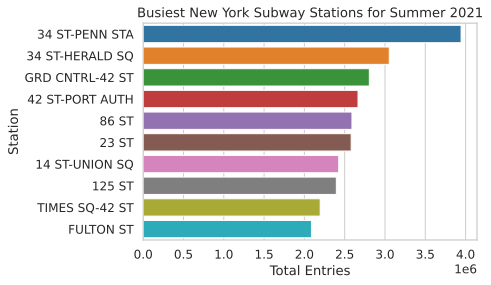

In [42]:
ax = sns.barplot(x = 'DAILY_ENTRIES',y='STATION',data=top_ten, palette='tab10')
ax.set_title('Busiest New York Subway Stations for Summer 2021')
ax.set_xlabel('Total Entries')
ax.set_ylabel('Station')
plt.savefig('Busiest Subway Stations.JPG', dpi=500)

In [43]:
station_daily = mta_daily_entries.groupby(["STATION", "DATE"])[['DAILY_ENTRIES']].sum().reset_index()
busiest_stations1 = station_daily[station_daily["STATION"] == '34 ST-PENN STA'].copy()


In [44]:
busiest_stations1['DAY_OF_WEEK_NUM'] = pd.to_datetime(busiest_stations1['DATE']).dt.dayofweek
busiest_stations1['WEEK_OF_YEAR'] = pd.to_datetime(busiest_stations1['DATE']).dt.isocalendar().week
busiest_stations1.head()

,STATION,DATE,DAILY_ENTRIES,DAY_OF_WEEK_NUM,WEEK_OF_YEAR
5488,34 ST-PENN STA,05/30/2021,23224.0,6,21
5489,34 ST-PENN STA,05/31/2021,29271.0,0,22
5490,34 ST-PENN STA,06/01/2021,46271.0,1,22
5491,34 ST-PENN STA,06/02/2021,45021.0,2,22
5492,34 ST-PENN STA,06/03/2021,45969.0,3,22


Text(0.5, 1.0, 'PENN ST')

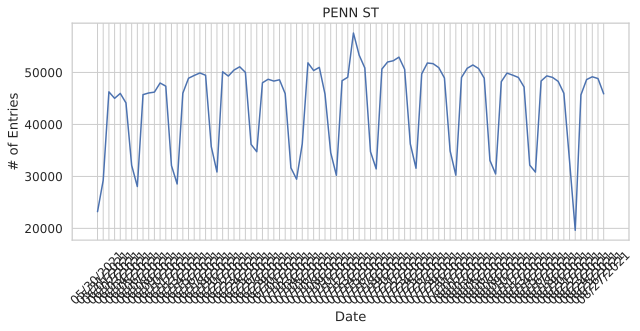

In [45]:
#plotting to check for large outliers
plt.figure(figsize=(10, 4))
plt.plot(busiest_stations1['DATE'], busiest_stations1['DAILY_ENTRIES'])
plt.ylabel('# of Entries')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title('PENN ST')

In [46]:
#finding median for day of week
median_nums = busiest_stations1.groupby('DAY_OF_WEEK_NUM')[['DAILY_ENTRIES']].median()
median_nums['DAY_OF_WEEK'] = ['MON', 'TUES', 'WED', "THUR",'FRI','SAT','SUN']
median_nums

,DAILY_ENTRIES,DAY_OF_WEEK
DAY_OF_WEEK_NUM,,
0,48230.0,MON
1,49303.0,TUES
2,49486.0,WED
3,49903.0,THUR
4,47364.0,FRI
5,33827.5,SAT
6,30243.0,SUN


In [47]:
#replacing outlier with day of week median
busiest_stations1.loc[5572, 'DAILY_ENTRIES'] = 30243.0

Text(0.5, 1.0, 'PENN ST')

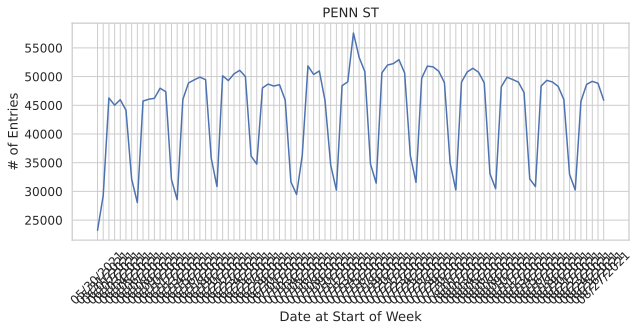

In [48]:
plt.figure(figsize=(10, 4))
plt.plot(busiest_stations1['DATE'], busiest_stations1['DAILY_ENTRIES'])
plt.ylabel('# of Entries')
plt.xlabel('Date at Start of Week')
plt.xticks(rotation=45)
plt.title('PENN ST')

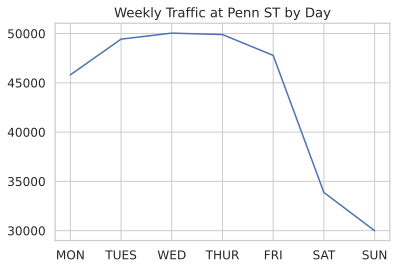

In [49]:
mean_nums = busiest_stations1.groupby('DAY_OF_WEEK_NUM')[['DAILY_ENTRIES']].mean()
mean_nums['DAY_OF_WEEK'] = ['MON', 'TUES', 'WED', "THUR",'FRI','SAT','SUN']
#ax = sns.barplot(x = 'DAY_OF_WEEK',y='DAILY_ENTRIES',data=mean_nums);
#ax.set_title('Average Enteries at Penn ST by Day of the Week')

plt.plot(mean_nums['DAY_OF_WEEK'], mean_nums['DAILY_ENTRIES'])
plt.title('Weekly Traffic at Penn ST by Day')
plt.savefig('Penn ST Entries by Day of Week.jpg', dpi=500)

In [59]:
#isolating penn data
penn_data = pd.read_sql('''SELECT ROW_NUMBER() OVER(PARTITION BY UNIT, SCP, DATE) AS '#_ENTRY_IN_DAY',
*
FROM mta_data
WHERE STATION = '34 ST-PENN STA'
AND
DESC = 'REGULAR';
''', engine)
penn_data

,#_ENTRY_IN_DAY,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,1,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,05/29/2021,00:00:00,REGULAR,252261,764932
1,2,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,05/29/2021,04:00:00,REGULAR,252263,764936
2,3,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,05/29/2021,08:00:00,REGULAR,252272,764967
3,4,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,05/29/2021,12:00:00,REGULAR,252313,765047
4,5,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,05/29/2021,16:00:00,REGULAR,252368,765119
...,...,...,...,...,...,...,...,...,...,...,...,...
55093,2,R142,R293,01-06-01,34 ST-PENN STA,123ACE,IRT,08/27/2021,06:00:00,REGULAR,68092313,18802296
55094,3,R142,R293,01-06-01,34 ST-PENN STA,123ACE,IRT,08/27/2021,10:00:00,REGULAR,68092354,18802400
55095,4,R142,R293,01-06-01,34 ST-PENN STA,123ACE,IRT,08/27/2021,14:00:00,REGULAR,68092410,18802501
55096,5,R142,R293,01-06-01,34 ST-PENN STA,123ACE,IRT,08/27/2021,18:00:00,REGULAR,68092485,18802628


In [60]:
#creating column date_time
penn_data["DATE_TIME"] = pd.to_datetime(penn_data.DATE + " " + penn_data.TIME)
penn_data.head()

,#_ENTRY_IN_DAY,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,1,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,05/29/2021,00:00:00,REGULAR,252261,764932,2021-05-29 00:00:00
1,2,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,05/29/2021,04:00:00,REGULAR,252263,764936,2021-05-29 04:00:00
2,3,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,05/29/2021,08:00:00,REGULAR,252272,764967,2021-05-29 08:00:00
3,4,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,05/29/2021,12:00:00,REGULAR,252313,765047,2021-05-29 12:00:00
4,5,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,05/29/2021,16:00:00,REGULAR,252368,765119,2021-05-29 16:00:00


In [61]:
#checking for duplicates
(penn_data
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head()

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,N067,R012,00-00-00,34 ST-PENN STA,2021-05-29 00:00:00,1
36723,R138,R293,00-00-02,34 ST-PENN STA,2021-07-19 06:00:00,1
36725,R138,R293,00-00-02,34 ST-PENN STA,2021-07-19 14:00:00,1
36726,R138,R293,00-00-02,34 ST-PENN STA,2021-07-19 18:00:00,1
36727,R138,R293,00-00-02,34 ST-PENN STA,2021-07-19 22:00:00,1


In [62]:
sorted_penn_data = penn_data.sort_values(['C/A','UNIT','SCP','DATE'])
sorted_penn_data.head()

,#_ENTRY_IN_DAY,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,1,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,05/29/2021,00:00:00,REGULAR,252261,764932,2021-05-29 00:00:00
1,2,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,05/29/2021,04:00:00,REGULAR,252263,764936,2021-05-29 04:00:00
2,3,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,05/29/2021,08:00:00,REGULAR,252272,764967,2021-05-29 08:00:00
3,4,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,05/29/2021,12:00:00,REGULAR,252313,765047,2021-05-29 12:00:00
4,5,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,05/29/2021,16:00:00,REGULAR,252368,765119,2021-05-29 16:00:00


In [63]:
sorted_penn_data["HOURLY_ENTRIES"] = sorted_penn_data.groupby(["C/A", "UNIT", "SCP"]).ENTRIES.apply(lambda x: x-x.shift(1))
sorted_penn_data.head()

,#_ENTRY_IN_DAY,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,HOURLY_ENTRIES
0,1,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,05/29/2021,00:00:00,REGULAR,252261,764932,2021-05-29 00:00:00,NaN
1,2,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,05/29/2021,04:00:00,REGULAR,252263,764936,2021-05-29 04:00:00,2.0
2,3,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,05/29/2021,08:00:00,REGULAR,252272,764967,2021-05-29 08:00:00,9.0
3,4,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,05/29/2021,12:00:00,REGULAR,252313,765047,2021-05-29 12:00:00,41.0
4,5,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,05/29/2021,16:00:00,REGULAR,252368,765119,2021-05-29 16:00:00,55.0


In [64]:
sorted_penn_data[["PREV_DATE_TIME", "PREV_ENTRIES"]] = (sorted_penn_data.groupby(["C/A", "UNIT", "SCP",])[["DATE_TIME", "ENTRIES"]]\
                                                        .apply(lambda grp: grp.shift(1)))
sorted_penn_data.dropna(subset=["PREV_DATE_TIME"], axis=0, inplace=True)
sorted_penn_data.head()

,#_ENTRY_IN_DAY,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,HOURLY_ENTRIES,PREV_DATE_TIME,PREV_ENTRIES
1,2,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,05/29/2021,04:00:00,REGULAR,252263,764936,2021-05-29 04:00:00,2.0,2021-05-29 00:00:00,252261.0
2,3,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,05/29/2021,08:00:00,REGULAR,252272,764967,2021-05-29 08:00:00,9.0,2021-05-29 04:00:00,252263.0
3,4,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,05/29/2021,12:00:00,REGULAR,252313,765047,2021-05-29 12:00:00,41.0,2021-05-29 08:00:00,252272.0
4,5,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,05/29/2021,16:00:00,REGULAR,252368,765119,2021-05-29 16:00:00,55.0,2021-05-29 12:00:00,252313.0
5,6,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,05/29/2021,20:00:00,REGULAR,252423,765186,2021-05-29 20:00:00,55.0,2021-05-29 16:00:00,252368.0


In [65]:
(sorted_penn_data[sorted_penn_data["ENTRIES"] < sorted_penn_data["PREV_ENTRIES"]]).shape

(550, 16)

In [66]:
sorted_penn_data.describe()

,#_ENTRY_IN_DAY,ENTRIES,EXITS,HOURLY_ENTRIES,PREV_ENTRIES
count,54996.000000,5.499600e+04,5.499600e+04,5.499600e+04,5.499600e+04
mean,3.501218,4.657655e+07,5.120172e+07,-2.149640e+03,4.657870e+07
std,1.710681,2.248830e+08,2.328849e+08,5.011248e+05,2.248831e+08
min,1.000000,0.000000e+00,0.000000e+00,-1.174405e+08,0.000000e+00
25%,2.000000,5.683815e+05,3.343092e+05,8.000000e+00,5.683815e+05
50%,3.000000,2.404369e+06,1.914356e+06,4.200000e+01,2.404470e+06
75%,5.000000,7.814266e+06,7.337125e+06,1.010000e+02,7.814232e+06
max,8.000000,1.569907e+09,1.368657e+09,1.962920e+05,1.569907e+09


In [67]:
def get_hourly_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    
    if counter < 0:
        counter = -counter 
        
    if counter > max_counter:
        print(f'entries: {row["ENTRIES"]} <-- {row["PREV_ENTRIES"]}')
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
        
    if counter > max_counter:
        return 0
    
    return counter
#testing here to see what it looks like when you assume you cannot have more than 1 person per turnstile per second,
sorted_penn_data["HOURLY_ENTRIES"] = sorted_penn_data.apply(get_hourly_counts, axis=1, max_counter=(500))

entries: 1168096 <-- 1167592.0
entries: 10590648 <-- 10590111.0
entries: 10591380 <-- 10590855.0
entries: 8993530 <-- 8992894.0
entries: 8994502 <-- 8993845.0
entries: 5671 <-- 4298891.0
entries: 0 <-- 117440512.0
entries: 7 <-- 201369.0
entries: 1049592 <-- 1049068.0
entries: 1075326 <-- 1074543.0
entries: 1077431 <-- 1076556.0
entries: 1079508 <-- 1078739.0
entries: 1081300 <-- 1080710.0
entries: 1086242 <-- 1085455.0
entries: 1088193 <-- 1087429.0
entries: 1090217 <-- 1089448.0
entries: 1092369 <-- 1091621.0
entries: 1094284 <-- 1093665.0
entries: 1099371 <-- 1098579.0
entries: 1101480 <-- 1100678.0
entries: 1103655 <-- 1102794.0
entries: 1105781 <-- 1104976.0
entries: 1107642 <-- 1107056.0
entries: 1112425 <-- 1111709.0
entries: 1114346 <-- 1113778.0
entries: 1116696 <-- 1115887.0
entries: 1118763 <-- 1117965.0
entries: 1120682 <-- 1120059.0
entries: 1125562 <-- 1124840.0
entries: 1127520 <-- 1126768.0
entries: 1129525 <-- 1128761.0
entries: 1131339 <-- 1130678.0
entries: 1133134 <

In [68]:
sorted_penn_data.describe()

,#_ENTRY_IN_DAY,ENTRIES,EXITS,HOURLY_ENTRIES,PREV_ENTRIES
count,54996.000000,5.499600e+04,5.499600e+04,54996.000000,5.499600e+04
mean,3.501218,4.657655e+07,5.120172e+07,70.134955,4.657870e+07
std,1.710681,2.248830e+08,2.328849e+08,81.255959,2.248831e+08
min,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,2.000000,5.683815e+05,3.343092e+05,9.000000,5.683815e+05
50%,3.000000,2.404369e+06,1.914356e+06,43.000000,2.404470e+06
75%,5.000000,7.814266e+06,7.337125e+06,100.000000,7.814232e+06
max,8.000000,1.569907e+09,1.368657e+09,500.000000,1.569907e+09


In [69]:
sorted_penn_data['DAY_OF_WEEK_NUM'] = pd.to_datetime(sorted_penn_data['DATE']).dt.dayofweek
sorted_penn_data.head()

,#_ENTRY_IN_DAY,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,HOURLY_ENTRIES,PREV_DATE_TIME,PREV_ENTRIES,DAY_OF_WEEK_NUM
1,2,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,05/29/2021,04:00:00,REGULAR,252263,764936,2021-05-29 04:00:00,2.0,2021-05-29 00:00:00,252261.0,5
2,3,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,05/29/2021,08:00:00,REGULAR,252272,764967,2021-05-29 08:00:00,9.0,2021-05-29 04:00:00,252263.0,5
3,4,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,05/29/2021,12:00:00,REGULAR,252313,765047,2021-05-29 12:00:00,41.0,2021-05-29 08:00:00,252272.0,5
4,5,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,05/29/2021,16:00:00,REGULAR,252368,765119,2021-05-29 16:00:00,55.0,2021-05-29 12:00:00,252313.0,5
5,6,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,05/29/2021,20:00:00,REGULAR,252423,765186,2021-05-29 20:00:00,55.0,2021-05-29 16:00:00,252368.0,5


In [70]:
penn_mask = (sorted_penn_data['DAY_OF_WEEK_NUM'] == 3) 
penn_hourly_totals = sorted_penn_data[penn_mask].groupby('TIME')['HOURLY_ENTRIES'].sum().reset_index()\
    .sort_values('TIME')

type(penn_hourly_totals)


pandas.core.frame.DataFrame

In [71]:
def put_in_neat_bins(row):
    t = row['TIME']
    
    if t > '00:00:00' and t <= '04:00:00':
        return '00:00 to 04:00'
        
    if t > '04:00:00' and t <= '08:00:00':
        return '04:00 to 08:00'
        
    if t > '08:00:00' and t <= '12:00:00':
        return '08:00 to 12:00'
        
    if t > '12:00:00' and t <= '16:00:00':
        return '12:00 to 16:00'
        
    if t > '16:00:00' and t <= '20:00:00':
        return '16:00 to 20:00'
        
    if t > '20:00:00' or t == '00:00:00':
        return '20:00 to 23:59' 
    
    return 'not everthing was sorted! look again'

In [72]:
penn_hourly_totals['bin'] = penn_hourly_totals.apply(put_in_neat_bins, axis = 1)
s_penn = penn_hourly_totals.groupby('bin')['HOURLY_ENTRIES'].sum().reset_index()\
    .sort_values('bin')
s_penn['HOURLY_MEAN'] = s_penn['HOURLY_ENTRIES'].apply(lambda x: int(x/13)) #13 is number of Wednesdays in the data set
s_penn.head()

,bin,HOURLY_ENTRIES,HOURLY_MEAN
0,00:00 to 04:00,16955.0,1304
1,04:00 to 08:00,73167.0,5628
2,08:00 to 12:00,146240.0,11249
3,12:00 to 16:00,130291.0,10022
4,16:00 to 20:00,178690.0,13745


Text(0.5, 1.0, 'Hourly Entries for Penn Station')

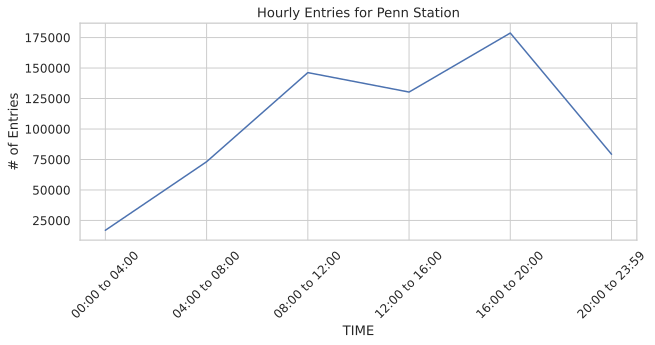

In [73]:
plt.figure(figsize=(10, 4))
plt.plot(s_penn['bin'], s_penn['HOURLY_ENTRIES'])
plt.ylabel('# of Entries')
plt.xlabel('TIME')
plt.xticks(rotation=45)
plt.title('Hourly Entries for Penn Station')

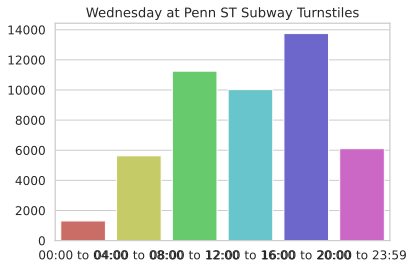

In [74]:
ax = sns.barplot(x = 'bin', y = 'HOURLY_MEAN', data = s_penn, palette='hls')
ax.set_title('Wednesday at Penn ST Subway Turnstiles')
ax.set_xlabel('')
ax.set_ylabel('')
plt.savefig('Wednesday Entries by Time of Day.JPG', dpi=500)